In [1]:
import json
from model_fit import read_features, parameter_fine_tuning, evaluate_model, weighted_ccc, separate_data

In [2]:
# read in catagory
with open('eu_soc_catalog.json', 'r') as file:
    lcov = json.load(file)
    
lcov = lcov['common']
# covs
folder_path = '/home/xuemeng/work_xuemeng/soc/SoilHealthDataCube/'
cov = read_features(f'{folder_path}/data/008_cov_rscfi.txt')

names=[]
path = {}
for key, values in lcov.items():
    path[key] = values['path']
    names.append(key)
    
geotiff_paths = [path[ii] for ii in cov if ii in names]
geotiff_paths.insert(0,'http://192.168.1.30:8333/tmp-eumap-ai4sh/v8/oc_iso.10694.1995.kg.m3_m_30m_b0cm..20cm_20200101_20221231_eu_epsg.3035_v20241216.tif')

In [3]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

polygon_path = "/home/xuemeng/work_xuemeng/soc/visualizaiton/plot_time.series/plot_time.series_polygon.gpkg"  # Replace with your polygon file
polygon = gpd.read_file(polygon_path)

oc_iso.10694.1995.kg.m3_m_30m_b0cm..20cm_20200101_20221231_eu_epsg.3035_v20241216.tif


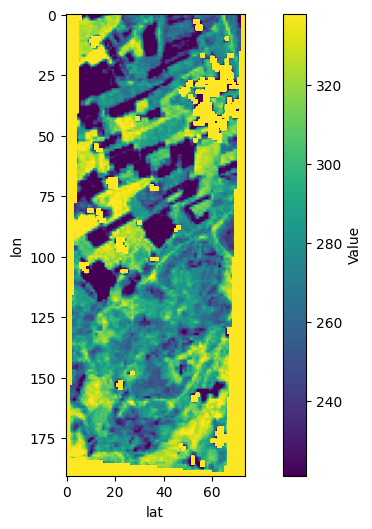

Press Enter to view the next GeoTIFF... 


fapar_glad.landsat.ard2.seasconv.longterm_p50_30m_s_20000101_20221231_eu_epsg.3035_v20231218.tif


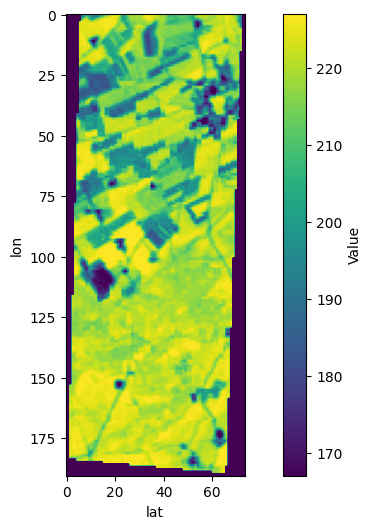

Press Enter to view the next GeoTIFF... 


ndvi_glad.landsat.ard2.seasconv.longterm_p50_30m_s_20000101_20221231_eu_epsg.3035_v20231127.tif


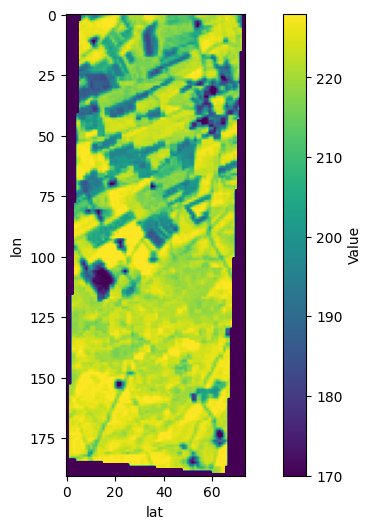

Press Enter to view the next GeoTIFF... 


ai_chelsa_m_1km_s_19810101_20101231_eu_epsg.3035_v20240531.tif


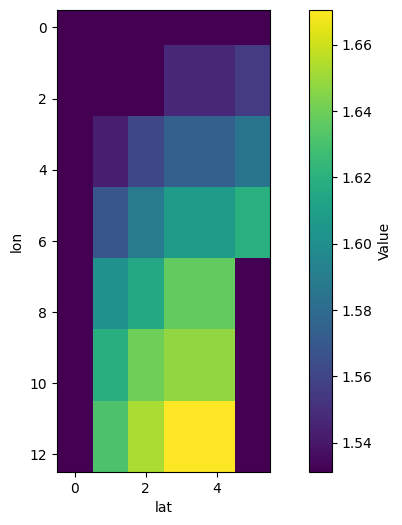

Press Enter to view the next GeoTIFF... 


fapar_glad.landsat.ard2.seasconv.longterm_p25_30m_s_20000101_20221231_eu_epsg.3035_v20231218.tif


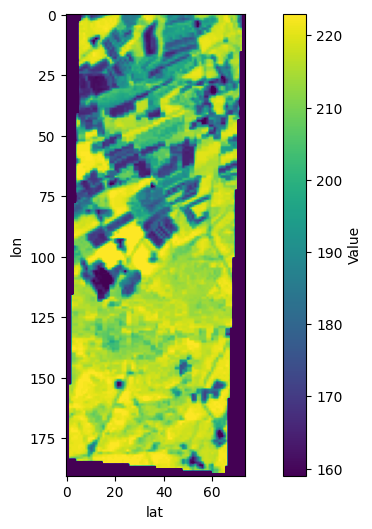

Press Enter to view the next GeoTIFF... 


bsf_glad.landsat.ard2.seasconv.longterm_p75_30m_s_20000101_20221231_eu_epsg.3035_v20231218.tif


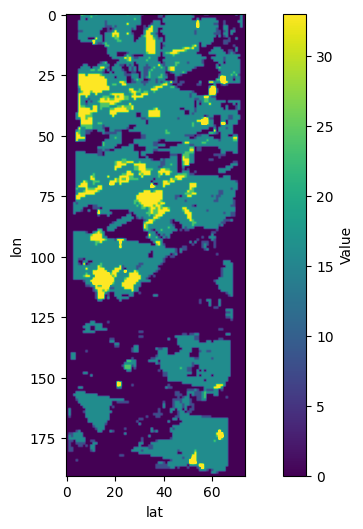

Press Enter to view the next GeoTIFF... 


ndvi_glad.landsat.ard2.seasconv.longterm_p25_30m_s_20000101_20221231_eu_epsg.3035_v20231127.tif


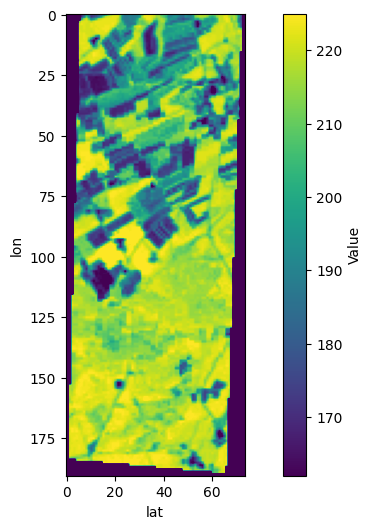

Press Enter to view the next GeoTIFF... 


ndvi_glad.landsat.ard2.seasconv.longterm_p75_30m_s_20000101_20221231_eu_epsg.3035_v20231127.tif


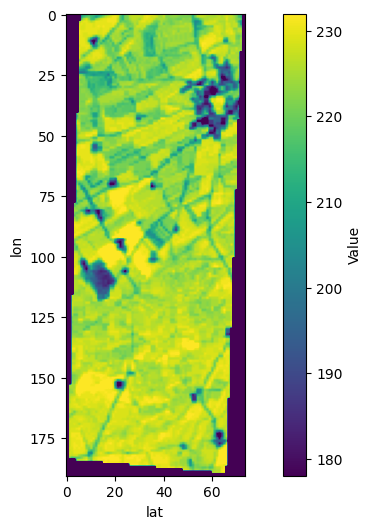

Press Enter to view the next GeoTIFF... 


fapar_glad.landsat.ard2.seasconv.longterm_p75_30m_s_20000101_20221231_eu_epsg.3035_v20231218.tif


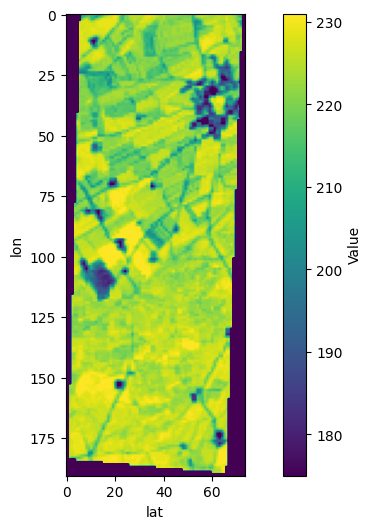

In [ ]:
import numpy as np
for path in geotiff_paths:
    print(path.split('/')[-1])
    with rasterio.open(path) as src:
        polygon = polygon.to_crs(src.crs)
        # Clip the raster with the polygon
        clipped_image, clipped_transform = mask(src, polygon.geometry, crop=True)
        clipped_image, clipped_transform = mask(src, polygon.geometry, crop=True)

        # Calculate the 0.02 and 0.98 percentiles of the raster values
        clipped_data = clipped_image[0]  # Extract the first band
        valid_data = clipped_data[clipped_data != src.nodata]  # Exclude nodata values
        vmin, vmax = np.percentile(valid_data, [12, 98])

        plt.figure(figsize=(10, 6))
        plt.imshow(clipped_image[0], cmap='viridis', vmin=vmin, vmax=vmax)
        plt.colorbar(label='Value')
        plt.xlabel("lat")
        plt.ylabel("lon")
        plt.show()

    input("Press Enter to view the next GeoTIFF...")
